## Im folgenden Notebook kann eine ausgewählte Frage einzeln ausgewertet werden.

Um gezielt eine Frage auswerten zu lassen, muss zunächst die Code Zelle (1) ausgeführt werden.* Danach müssen (3) und (4) ausgeführt werden. In der Ausgabe von (4) öffnet sich ein Eingabefenster, in das die gewünschte Frage im Format question1 für Frage 1 eingetragen und mit Enter bestätigt werden. Im letzten Schritt wird dann (5) ausgeführt und liefert das Diegramm für die gewünschte Frage

*Wenn es in der Ausgabe (1) zu einem Fehler kommt, so können in der Code Zelle (2) die # entfernt werden und danach muss (2) ausgeführt werden



### Import der benötigten Module (1)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from io import StringIO
import requests

### Nachinstallieren, falls noch nicht vorhanden (2)

In [2]:
#!pip install requests
#!pip install pandas
#!pip install matplotlib
#!pip install ipywidgets

### Auslesen der Csv Datei (3)

In [7]:
url = 'https://sesec.pyhasse.org/get_results.csv'
dats = ""
response = requests.get(url)
dat = response.text.split('\n')


for i in dat[:-1]:
        dats +="\'"
        dats += "".join(i)
        dats +="\'\n"
data = pd.read_csv(StringIO(dats), delimiter=';')

### Auswahl der Frage (4)

Im Textfeld muss die gewünschte Frage eingetragen werden. WICHTIG: Fomat question2 für Frage 2 und nach eintragen der Frage muss die Eingabe durch ENTER bestätigt werden.

In [4]:
output_text = widgets.Text()
input_text = widgets.Text()
def bind_input_to_output(sender):
    output_text.value = input_text.value
input_text.on_submit(bind_input_to_output)
input_text

Text(value='')

### Auswertung der Frage (5)

Damit die Frage ausgewertet werden kann, muss die nächste Zelle nach Eingabe in das Textfeld und der dazugehörigen Bestätigung ausgeführt werden.

Auswertung von: question4
Antwort 1:  11
Antwort 2:  71
Antwort 3:  66
Antwort 4:  23


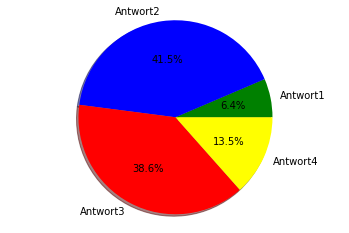

In [8]:
string = ""
for val in data[output_text.value]:
    string = f"{string},{val}"

summe = string.count("1") + string.count("2") + string.count("3") + string.count("4")
kreis = 100 / summe


if string.count("1") == 0:
    ant1 = 0
else:
    ant1 = string.count("1") * kreis
    

if string.count("2") == 0:
    ant2 = 0 
else:
    ant2 = string.count("2") * kreis
    
if string.count("3") == 0:
    ant3 = 0
else:
    ant3 = string.count("3") * kreis
    
if string.count("4") == 0:
    ant4 = 0
else:
    ant4 = string.count("4") * kreis
    
print("Auswertung von:",output_text.value)
print("Antwort 1: ",string.count("1"))
print("Antwort 2: ",string.count("2"))
print("Antwort 3: ",string.count("3"))
print("Antwort 4: ",string.count("4"))

plt.style.use('seaborn-bright')

labels = 'Antwort1', 'Antwort2', 'Antwort3', 'Antwort4'
sizes = [ant1, ant2, ant3, ant4]
colors = ['green', 'blue', 'red', 'yellow']

plt.pie(sizes,              
        labels=labels,      
        colors=colors,      
        autopct='%1.1f%%',  
        shadow=True,        
        startangle=0)     

plt.axis('equal')

plt.show()